### Problem statement 

### Loading the libraries 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading dataset 

In [2]:
df = pd.read_csv("diabetes1-Copy1.csv")

In [3]:
print(len(df)) # 768 records

768


In [4]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Domain analysis: 

### Basic checks: 

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# no null values, all are numerical columns
# total 9 columns, 'Outcome' is the target variable.

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [9]:
# Data is corrupted because columns like Glucose, Blood Pressure, Skin Thickness, Insulin, BMI has minimum value as 0 (which indicates the qualities of a dead person).
# finding unique values in outcome

### EDA 

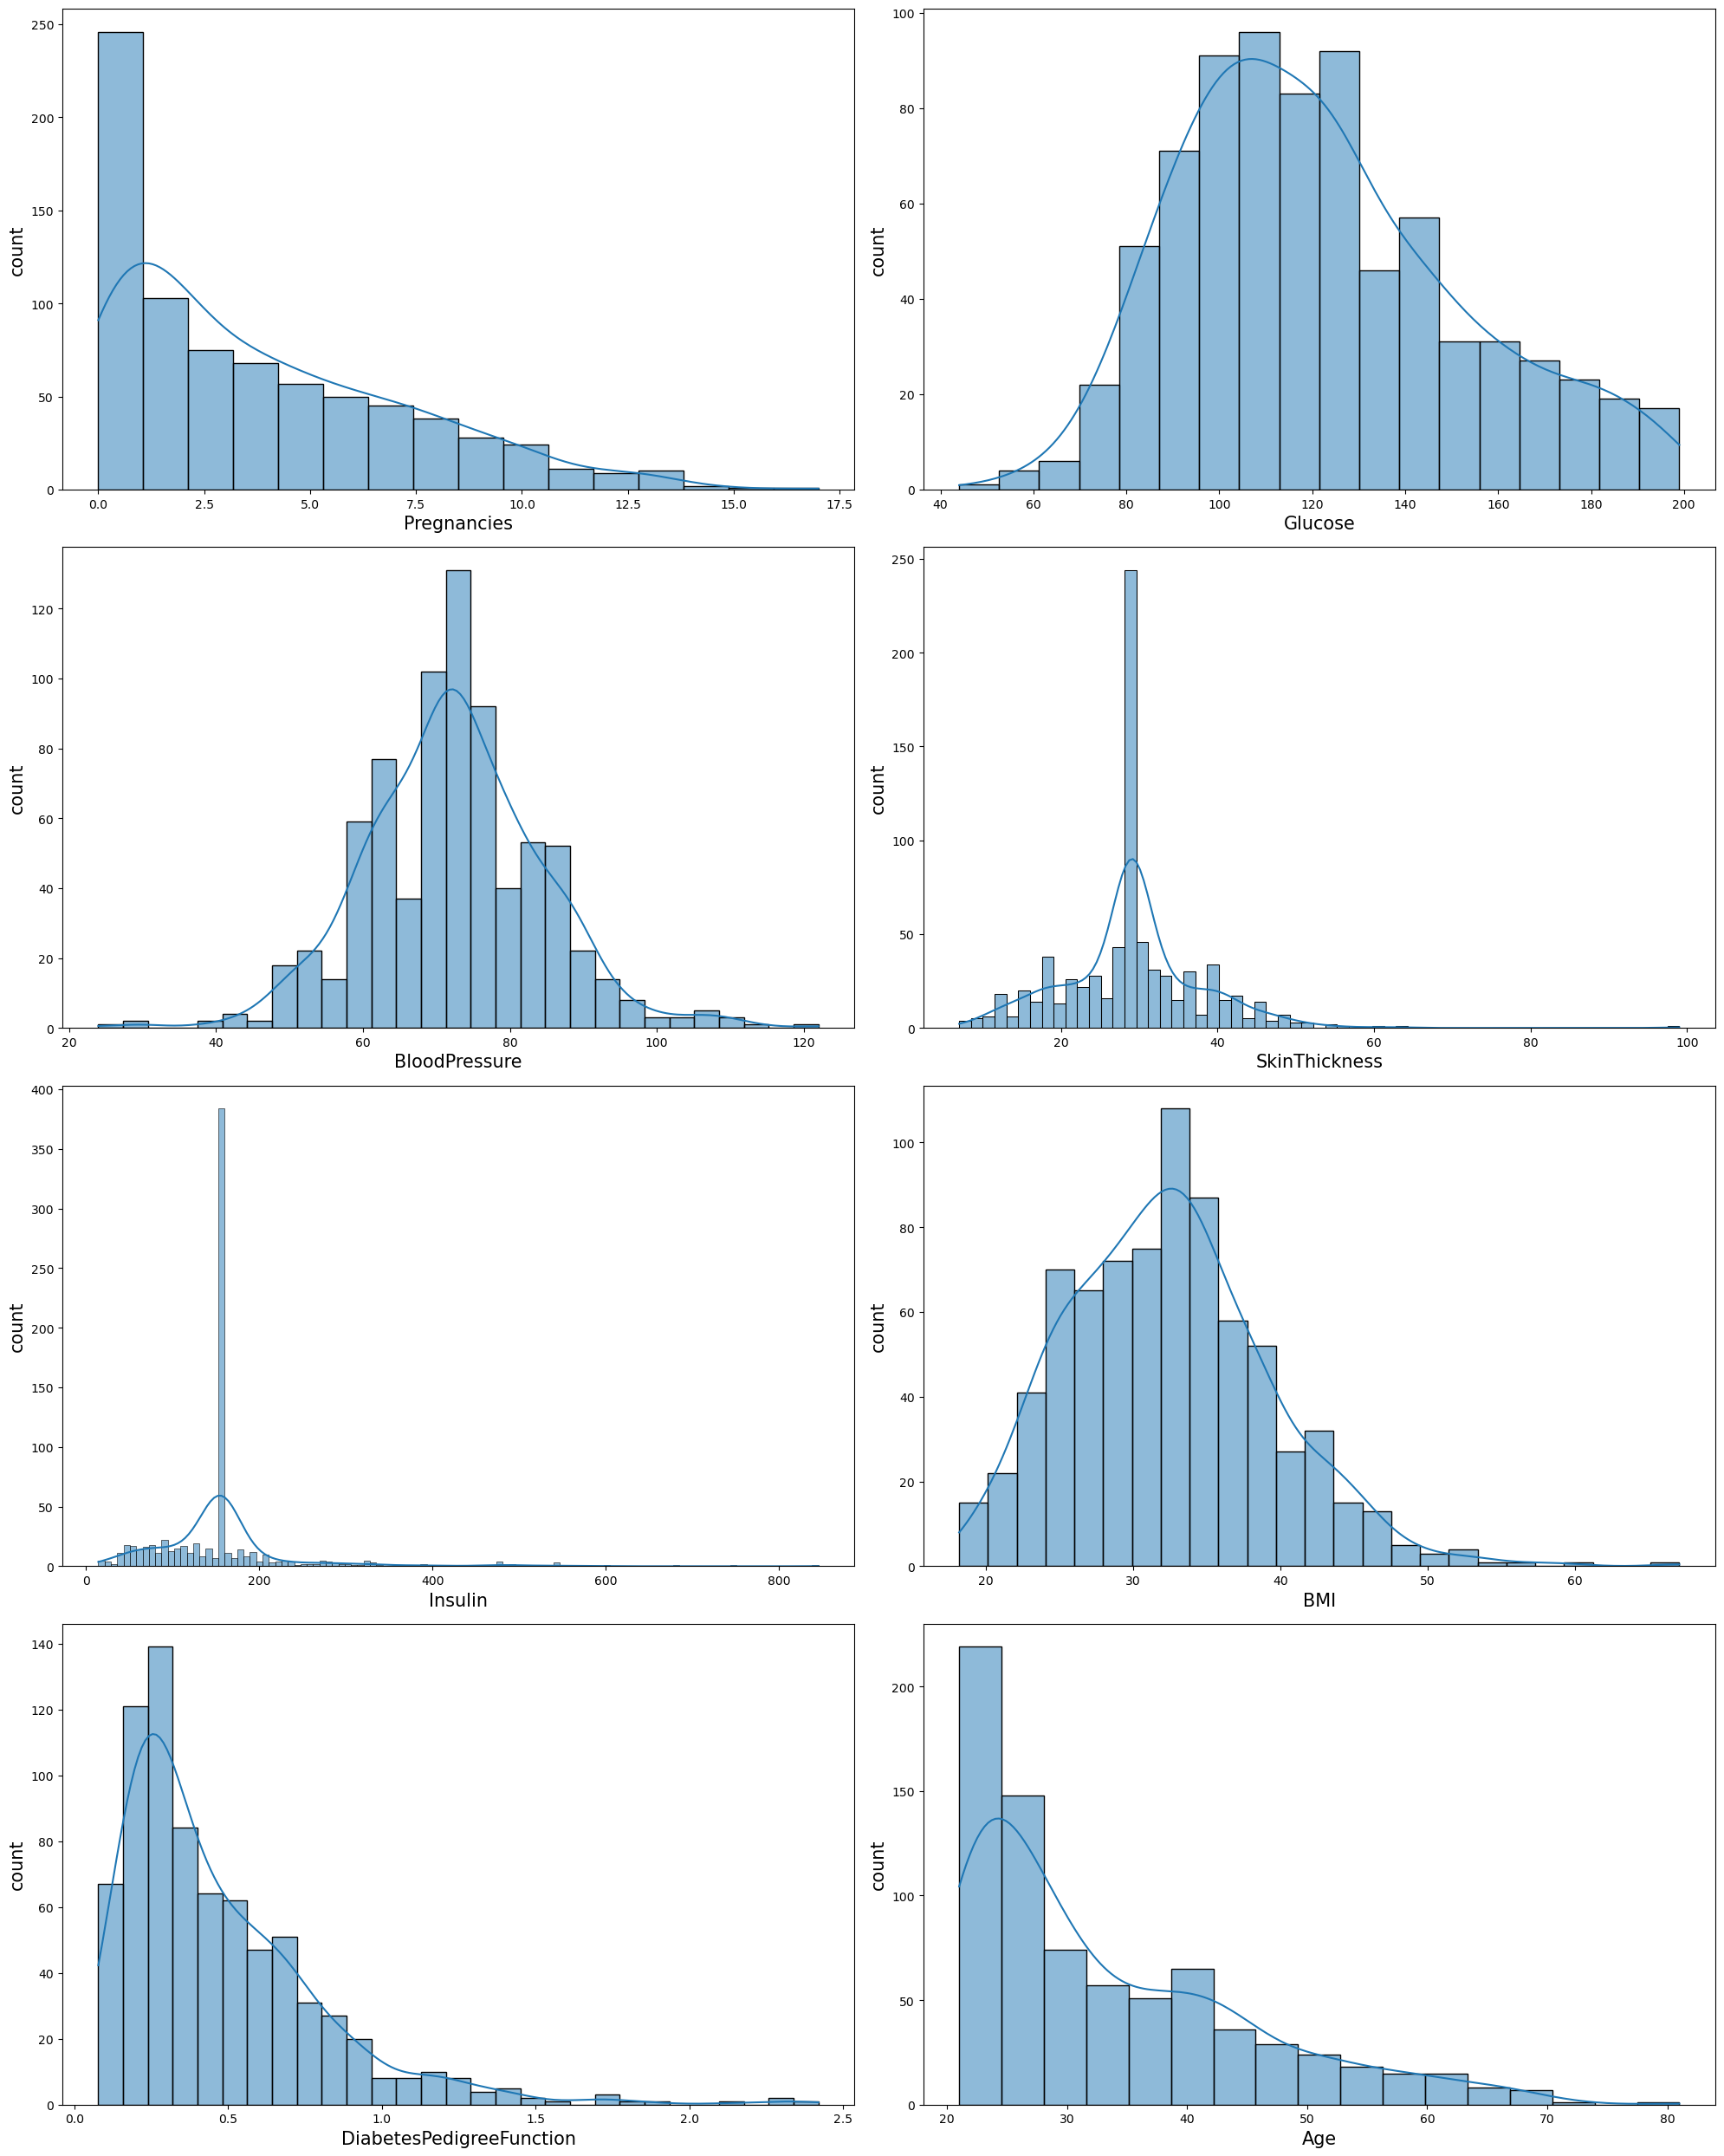

In [15]:
# univariate analyis

plt.figure(figsize=(20,25), facecolor= 'white')
plotnum =1

for column in df.drop('Outcome', axis=1):
    if plotnum <9:
        ax= plt.subplot(4,2, plotnum)
        sns.histplot(data=df, x= column, kde= True)
        plt.xlabel(column, fontsize= 15)
        plt.ylabel('count', fontsize= 15)
    plotnum +=1
plt.tight_layout()

In [ ]:
# normal distributions: Glucose, Bloodpressure, skin thickness, BMI, Insulin
# skewed: DiabetesPedigreeFunction, Age, Pregnancies

### Data cleaning 

In [10]:
#no null values

In [11]:
df.duplicated().sum() # no duplicate records

0

In [12]:
# Handling corrupted data

# two ways
# 1. replacing 0 with median using loc function
# 2. using replace function, median value can be adjusted in 0 places
# 3. using replace function, Nan is entered in 0 places, 
# then mean is found by dropping Nan values, and then
# mean value is adjusted.

zero_not_accepted= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in zero_not_accepted:
    df[column]= df[column].replace(0, np.NaN) #Nan is assigned to 0 places
    mean = int(df[column].mean(skipna= True)) # mean is found by dropping Nan
    df[column] = df[column].replace(np.NaN, mean) # calculated mean is assigned to Nan places

In [13]:
# checking one of the corrupted columns after handling the zeros
pd.set_option('display.max_rows', None)
print(df['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
5      116.0
6       78.0
7      115.0
8      197.0
9      125.0
10     110.0
11     168.0
12     139.0
13     189.0
14     166.0
15     100.0
16     118.0
17     107.0
18     103.0
19     115.0
20     126.0
21      99.0
22     196.0
23     119.0
24     143.0
25     125.0
26     147.0
27      97.0
28     145.0
29     117.0
30     109.0
31     158.0
32      88.0
33      92.0
34     122.0
35     103.0
36     138.0
37     102.0
38      90.0
39     111.0
40     180.0
41     133.0
42     106.0
43     171.0
44     159.0
45     180.0
46     146.0
47      71.0
48     103.0
49     105.0
50     103.0
51     101.0
52      88.0
53     176.0
54     150.0
55      73.0
56     187.0
57     100.0
58     146.0
59     105.0
60      84.0
61     133.0
62      44.0
63     141.0
64     114.0
65      99.0
66     109.0
67     109.0
68      95.0
69     146.0
70     100.0
71     139.0
72     126.0
73     129.0
74      79.0
75     121.0
76      62.0

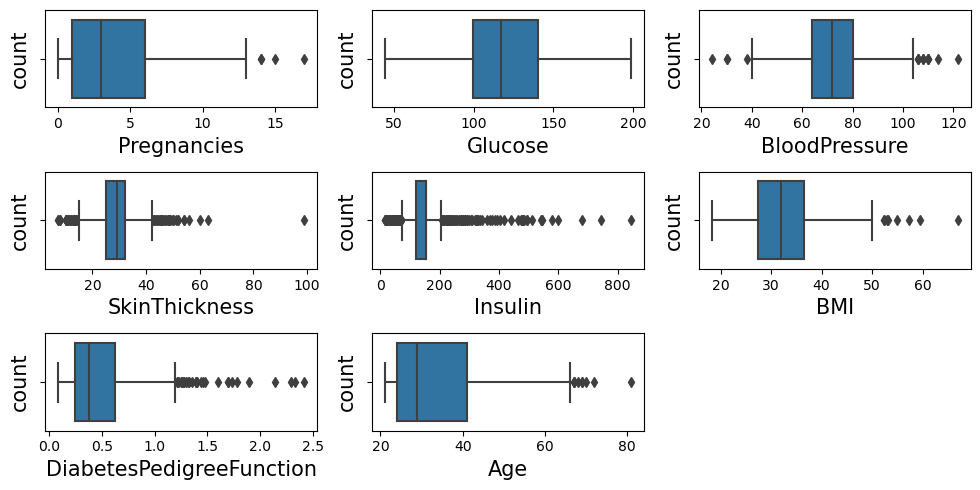

In [14]:
# checking outliers

plt.figure(figsize = (10, 5), facecolor ='white')
plotnumber =1

for column in df: # (or) for column in data.drop('Outcome', axis =1):
    if plotnumber <9:
        ax = plt.subplot(3,3, plotnumber)
        sns.boxplot(data= df, x= column)
        plt.xlabel(column, fontsize = 15)
        plt.ylabel('count', fontsize = 15)
    plotnumber +=1
plt.tight_layout()

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
# Handling outliers
# Pregnancies
# skewed distribution- iqr method

q1=df['Pregnancies'].quantile(0.25)
q3=df['Pregnancies'].quantile(0.75)
iqr= q3 - q1
lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr
print('lower limit is',lower_lim)
print('upper limit is', upper_lim)


lower limit is -6.5
upper limit is 13.5


In [19]:
df.loc[df['Pregnancies']< lower_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [20]:
df.loc[df['Pregnancies'] > upper_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
455,14,175.0,62.0,30.0,155.0,33.6,0.212,38,1


In [21]:
df.loc[df['Pregnancies'] > upper_lim, 'Pregnancies'] = np.median(df['Pregnancies'])

<Axes: xlabel='Pregnancies'>

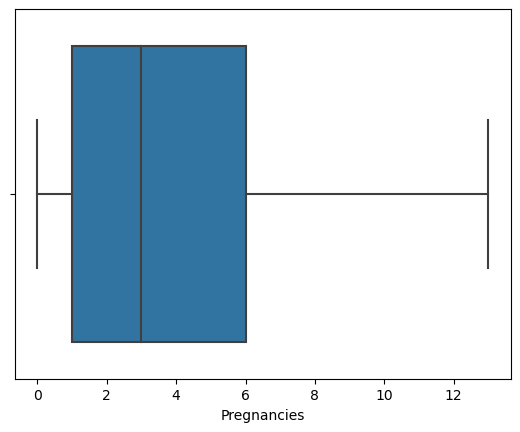

In [22]:
sns.boxplot(data= df, x= 'Pregnancies')

In [23]:
# BloodPressure
# normal distribution
mean= np.mean(df['BloodPressure'])
std= df.BloodPressure.std()
lower_lim = mean - 3*std
upper_lim = mean + 3*std
print('lower limit is', lower_lim)
print('upper limit is', upper_lim)



lower limit is 36.096793548065584
upper limit is 108.67664395193441


In [24]:
df.loc[df['BloodPressure'] < lower_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
597,1,89.0,24.0,19.0,25.0,27.8,0.559,21,0


In [25]:
df.loc[df['BloodPressure'] > upper_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
106,1,96.0,122.0,29.0,155.0,22.4,0.207,27,0
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
549,4,189.0,110.0,31.0,155.0,28.5,0.680,37,0
691,13,158.0,114.0,29.0,155.0,42.3,0.257,44,1


In [26]:
df.loc[df['BloodPressure'] < lower_lim, 'BloodPressure'] = np.mean(df['BloodPressure'])

In [27]:
df.loc[df['BloodPressure'] > upper_lim, 'BloodPressure'] = np.mean(df['BloodPressure'])

<Axes: xlabel='BloodPressure'>

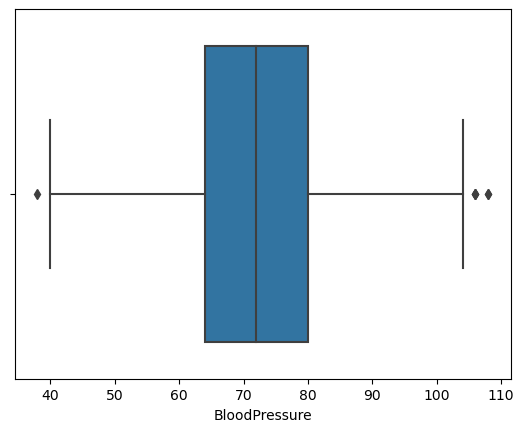

In [28]:
sns.boxplot(data= df, x= 'BloodPressure')

In [35]:
# SkinThickness
# normal distribution

mean= np.mean(df['SkinThickness'])
std= df.SkinThickness.std()
lower_lim = mean - 3*std
upper_lim = mean + 3*std
print('lower limit is', lower_lim)
print('upper limit is', upper_lim)


lower limit is 2.7344098473974583
upper limit is 55.48173598593588


In [36]:
df.loc[df['SkinThickness'] < lower_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [37]:
df.loc[df['SkinThickness'] > upper_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100.0,88.0,60.0,110.0,46.8,0.962,31,0
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
579,2,197.0,70.0,99.0,155.0,34.7,0.575,62,1


In [38]:
df.loc[df['SkinThickness'] > upper_lim, 'SkinThickness'] = np.mean(df['SkinThickness'])


<Axes: xlabel='SkinThickness'>

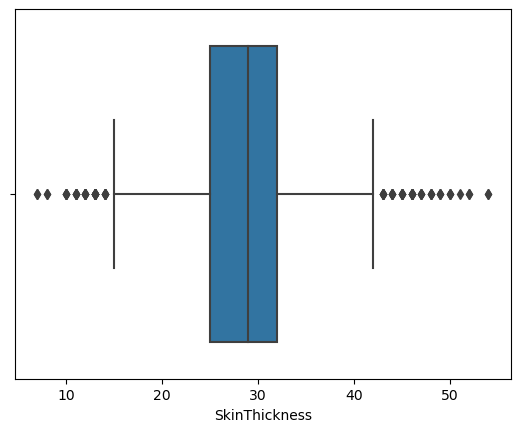

In [40]:
sns.boxplot(data= df, x= 'SkinThickness')

In [41]:
# Insulin
# normal distribution

mean= np.mean(df['Insulin'])
std= df.Insulin.std()
lower_lim = mean - 3*std
upper_lim = mean + 3*std
print('lower limit is', lower_lim)
print('upper limit is', upper_lim)


lower limit is -99.78339975395338
upper limit is 410.3458997539534


In [42]:
df.loc[df['Insulin'] < lower_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [43]:
df.loc[df['Insulin'] > upper_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,1
153,1,153.0,82.0,42.0,485.0,40.6,0.687,23,0
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,1
220,0,177.0,60.0,29.0,478.0,34.6,1.072,21,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
286,5,155.0,84.0,44.0,545.0,38.7,0.619,34,0
370,3,173.0,82.0,48.0,465.0,38.4,2.137,25,1


In [44]:
df.loc[df['Insulin'] > upper_lim, 'Insulin'] = np.mean(df['Insulin'])

<Axes: xlabel='Insulin'>

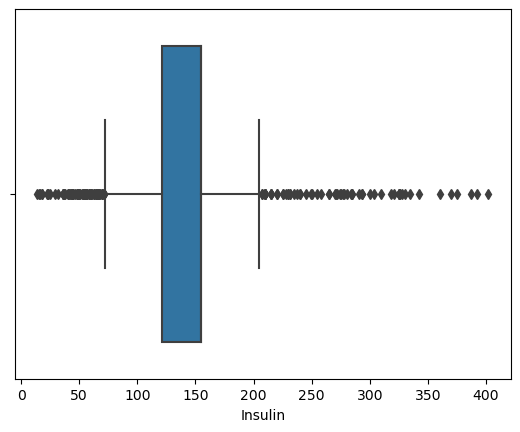

In [45]:
sns.boxplot(data= df, x= 'Insulin')

In [46]:
df.loc[df['Insulin'] > upper_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [47]:
# BMI
# normal distribution

mean= np.mean(df['BMI'])
std= df.BMI.std()
lower_lim = mean - 3*std
upper_lim = mean + 3*std
print('lower limit is', lower_lim)
print('upper limit is', upper_lim)


lower limit is 11.824812048409168
upper limit is 53.07701086825749


In [48]:
df.loc[df['BMI'] < lower_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [49]:
df.loc[df['BMI'] > upper_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76.000000,29.108073,100.0,53.2,0.759,25,1
125,1,88.0,72.386719,42.000000,99.0,55.0,0.496,26,1
177,0,129.0,72.560104,46.000000,130.0,67.1,0.319,26,1
445,0,180.0,78.000000,29.108073,14.0,59.4,2.420,25,1
673,3,123.0,100.000000,35.000000,240.0,57.3,0.880,22,0


In [50]:
df.loc[df['BMI'] > upper_lim, 'BMI'] = np.mean(df['BMI'])

<Axes: xlabel='BMI'>

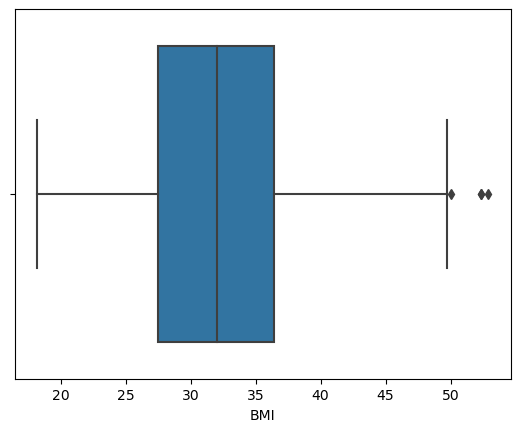

In [51]:
sns.boxplot(data=df, x= 'BMI')

In [53]:
# DiabetesPedigreeFunction
# skewed distribution

q1=df['DiabetesPedigreeFunction'].quantile(0.25)
q3=df['DiabetesPedigreeFunction'].quantile(0.75)
iqr= q3 - q1
lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr
print('lower limit is',lower_lim)
print('upper limit is', upper_lim)


lower limit is -0.32999999999999996
upper limit is 1.2


In [54]:
df.loc[df['DiabetesPedigreeFunction']< lower_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [55]:
df.loc[df['DiabetesPedigreeFunction']> upper_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.000000,168.00000,43.100000,2.288,33,1
12,10,139.0,80.0,29.000000,155.00000,27.100000,1.441,57,0
39,4,111.0,72.0,47.000000,207.00000,37.100000,1.390,56,1
45,0,180.0,66.0,39.000000,155.00000,42.000000,1.893,25,1
58,0,146.0,82.0,29.000000,155.00000,40.500000,1.781,44,0
100,1,163.0,72.0,29.000000,155.00000,39.000000,1.222,33,1
147,2,106.0,64.0,35.000000,119.00000,30.500000,1.400,34,0
187,1,128.0,98.0,41.000000,58.00000,32.000000,1.321,33,1
218,5,85.0,74.0,22.000000,155.00000,29.000000,1.224,32,1
228,4,197.0,70.0,39.000000,155.28125,36.700000,2.329,31,0


In [56]:
df.loc[df['DiabetesPedigreeFunction']> upper_lim, 'DiabetesPedigreeFunction'] = np.median(df['DiabetesPedigreeFunction'])

In [57]:
df.loc[df['DiabetesPedigreeFunction']> upper_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [58]:
# Age
# skewed distribution

q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr= q3 - q1
lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr
print('lower limit is',lower_lim)
print('upper limit is', upper_lim)


lower limit is -1.5
upper limit is 66.5


In [59]:
df.loc[df['Age']< lower_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [60]:
df.loc[df['Age'] > upper_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132.0,80.0,29.0,155.0,26.8,0.186,69,0
363,4,146.0,78.0,29.0,155.0,38.5,0.520,67,1
453,2,119.0,72.0,29.0,155.0,19.6,0.832,72,0
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0
489,8,194.0,80.0,29.0,155.0,26.1,0.551,67,0
537,0,57.0,60.0,29.0,155.0,21.7,0.735,67,0
666,4,145.0,82.0,18.0,155.0,32.5,0.235,70,1
674,8,91.0,82.0,29.0,155.0,35.6,0.587,68,0
684,5,136.0,82.0,29.0,155.0,32.0,0.640,69,0


In [61]:
df.loc[df['Age'] > upper_lim, 'Age'] = np.median(df['Age'])

In [62]:
df.loc[df['Age'] > upper_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [63]:
# scaling

#only for continuous independent columns
from sklearn.preprocessing import MinMaxScaler
scaled_data= MinMaxScaler()
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]= scaled_data.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [64]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.670968,0.485714,0.595745,0.363402,0.443804,0.493261,0.644444,1
1,1,0.264516,0.400000,0.468085,0.363402,0.242075,0.245283,0.222222,0
2,8,0.896774,0.371429,0.468085,0.363402,0.146974,0.533693,0.244444,1
3,1,0.290323,0.400000,0.340426,0.206186,0.285303,0.079964,0.000000,0
4,0,0.600000,0.028571,0.595745,0.396907,0.717579,0.264600,0.266667,1


### feature selection 

### Model building: 

In [65]:
# Splitting the data

X= df.iloc[:, :-1]
y= df.Outcome

In [66]:
# train-test-split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=3)
### Random state- (ensures reproducibility) prevents the model from doing train test split every time we run the cell 

In [67]:
y_train.value_counts()

Outcome
0    408
1    206
Name: count, dtype: int64

In [68]:
# balancing the dataset (only training data)

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_sm, y_train_sm= smote.fit_resample(X_train, y_train)

In [69]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_train_sm))

Counter({0: 408, 1: 206})
Counter({1: 408, 0: 408})


In [ ]:
# K value is chosen either by cross validation techniques like grid search 
# or other model evaluation metrics can be used to check and do trial and error
# or common method of square root of n method where n is the total no of data points

In [70]:
# Default knn model

from sklearn.neighbors import KNeighborsClassifier
knn1= KNeighborsClassifier()
knn1.fit(X_train_sm, y_train_sm)

KNeighborsClassifier()

In [71]:
y_hat1= knn1.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
accuracy_score(y_test, y_hat1)

0.6883116883116883

In [73]:
confusion_matrix(y_test, y_hat1)

array([[63, 29],
       [19, 43]], dtype=int64)

In [74]:
print(classification_report(y_test, y_hat1))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72        92
           1       0.60      0.69      0.64        62

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.70      0.69      0.69       154



In [ ]:
# by default knn model with n=5, the accuracy score is 0.68

In [78]:
X_train_sm.shape


(816, 8)

In [79]:
y_train_sm.shape


(816,)

In [80]:
X_test.shape


(154, 8)

In [81]:
y_test.shape

(154,)

In [82]:
# Trying model 2 with different k value

# square root method= sqrt(n) where is the total no of data points in the training dataset
# i.e., Xtrain

import math
math.sqrt(len(X_train)) # taking k value as odd number 

24.779023386727733

In [78]:
df.shape

(768, 9)

In [83]:
knn2= KNeighborsClassifier(n_neighbors=24, p=2, metric= 'euclidean', n_jobs=-1) # p- power parametric for the distance metric, 'p=2' denotes equivalent to euclidean distance
knn2.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=24)

In [84]:
# prediction and evaluation
y_hat2= knn2.predict(X_test)

In [85]:
accuracy_score(y_test, y_hat2)

0.7207792207792207

In [86]:
confusion_matrix(y_test, y_hat2)

array([[65, 27],
       [16, 46]], dtype=int64)

In [87]:
# Training accuracy
y_train_acc= knn2.predict(X_train_sm)
accuracy_score(y_train_sm, y_train_acc)

0.7463235294117647

In [ ]:
# Insights:
# After finding k value as square root method, (k=24), the accuracy score is 0.72

In [96]:
# Initialising model 3
# paramerters tuning
from sklearn.model_selection import RandomizedSearchCV

param_grid= {'n_neighbors' : list(range(1,30)),
            'metric':['euclidean', 'manhattan', 'minkowski']}
knn3= KNeighborsClassifier()
randomized= RandomizedSearchCV(knn3, param_grid, cv=5, scoring= 'accuracy')
randomized.fit(X_train_sm, y_train_sm)

best_params= randomized.best_params_
print(f'Best hyperparameters: ', best_params)

Best hyperparameters:  {'n_neighbors': 2, 'metric': 'manhattan'}


In [97]:
knn4= KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn4.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [98]:
#prediction and evaluation

y_hat3= knn4.predict(X_test)
accuracy_score(y_test, y_hat3)

0.7337662337662337

In [101]:
confusion_matrix(y_test, y_hat3)

array([[81, 11],
       [30, 32]], dtype=int64)

In [102]:
#training accuracy
y_train_acc_knn4= knn4.predict(X_train_sm)
accuracy_score(y_train_acc_knn4, y_train_sm)

0.9387254901960784

In [94]:
# k value of 2 gives the testing accuracy of 0.73 after hyperparameter tuning
# model is overfitting